# Kaggle 기본 예제
# 타이타닉 탑승자 데이터를 기반으로 생존자 예측해보기

### 필요한 모듈 import 및 데이터 로드

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#초기 주피터 노트북 matplotlib 동작 오류 해결 방법
%matplotlib inline

titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- feature 확인

- NaN들 처리 필요할듯 함

In [16]:
# 데이터 정보 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Age와 Cabin, Embarked 데이터 갯수 일치 X, 그중 Cabin이 심각

In [17]:
'''
대략적인 컬럼 정보
 0   PassengerId  891 non-null    int64   - 탑승자 데이터 일련번호
 1   Survived     891 non-null    int64   - 생존여부 (0:사망, 1:생존)
 2   Pclass       891 non-null    int64   - 티켓의 선실 등급 (1:1등석, 2:2등석, 3:3등석)
 3   Name         891 non-null    object  - 탑승자 이름
 4   Sex          891 non-null    object  - 탑승자 성별
 5   Age          714 non-null    float64 - 탑승자 나이
 6   SibSp        891 non-null    int64   - 같이 탑승한 형제자매 또는 배우자의 인원수
 7   Parch        891 non-null    int64   - 같이 탑승한 부모 또는 어린이 인원수
 8   Ticket       891 non-null    object  - 티켓번호
 9   Fare         891 non-null    float64 - 요금
 10  Cabin        204 non-null    object  - 선실번호
 11  Embarked     889 non-null    object  - 중간 정착 항구 (C:Cherbourg, Q:Queenstown, S:Southhampton)
'''

'\n대략적인 컬럼 정보\n 0   PassengerId  891 non-null    int64   - 탑승자 데이터 일련번호\n 1   Survived     891 non-null    int64   - 생존여부 (0:사망, 1:생존)\n 2   Pclass       891 non-null    int64   - 티켓의 선실 등급 (1:1등석, 2:2등석, 3:3등석)\n 3   Name         891 non-null    object  - 탑승자 이름\n 4   Sex          891 non-null    object  - 탑승자 성별\n 5   Age          714 non-null    float64 - 탑승자 나이\n 6   SibSp        891 non-null    int64   - 같이 탑승한 형제자매 또는 배우자의 인원수\n 7   Parch        891 non-null    int64   - 같이 탑승한 부모 또는 어린이 인원수\n 8   Ticket       891 non-null    object  - 티켓번호\n 9   Fare         891 non-null    float64 - 요금\n 10  Cabin        204 non-null    object  - 선실번호\n 11  Embarked     889 non-null    object  - 중간 정착 항구 (C:Cherbourg, Q:Queenstown, S:Southhampton)\n'

# 데이터 전처리

- NaN이 있으면 안되니까 드랍하거나 대체 - 전처리 필요

In [18]:
# 기본적으로 머신러닝 알고리즘은 null을 허용하지 않으므로 null처리가 필요
# 현재 데이터 상태를 고려하여 채우는 방법을 선택 : fillna()

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)  #평균낼 주위값이 없을 정도임, 'N'으로 대체
titanic_df['Embarked'].fillna('N', inplace=True)

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [20]:
# null 처리가 잘 되었는지 확인
titanic_df.isnull().sum()  
# ==> True,Fasle를 돌려주지만 실제로 줄때는 1,0으로 주니까 다 더해서 0이면 모두 False

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
# 문자열 데이터 확인
print('Sex 분포:\n', titanic_df['Sex'].value_counts())

sex 분포:
 male      577
female    314
Name: Sex, dtype: int64


In [13]:
print('Cabin 분포:\n', titanic_df['Cabin'].value_counts())
#이 결과로는 알기 어려울듯?

Cabin 분포:
 N              687
C23 C25 C27      4
B96 B98          4
G6               4
C22 C26          3
              ... 
B30              1
B50              1
C148             1
B101             1
C85              1
Name: Cabin, Length: 148, dtype: int64


In [14]:
print('Embarked 분포:\n', titanic_df['Embarked'].value_counts())
#생존과 관련이 있는지 의문

Embarked 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [17]:
# Cabin 속성을 첫글자만 추출하여 정리
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df.Cabin.head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [25]:
# 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환 - 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

# 한꺼번에 변환
def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    le = LabelEncoder()
    for feature in features:
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [26]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3


### 데이터 탐색과 가설 설정

* 어떤 유형의 승객이 생존확률이 높았을지 확인(가설)

    1) 성별
    
    2) 부자 또는 유명인
    
    3) 선실 등급


In [21]:
# 1) 성별에 따른 생존 결과 확인 - 데이터 (0:사망, 1:생존)
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()  #묶고 Survived컬럼만 보이도록 해서 카운트

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

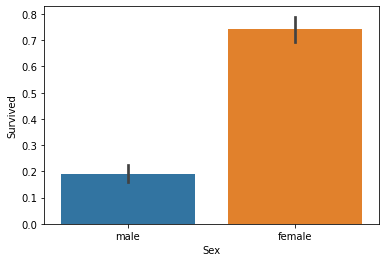

In [23]:
# 시각화를 통해 직관적으로 판단할 수 있도록 도울 수 있음
sns.barplot(x='Sex', y='Survived', data=titanic_df)

- 성별로는 female이 더 많이 삶

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

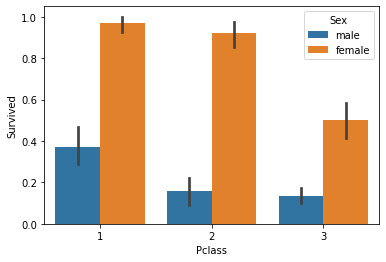

In [4]:
# 2) 부자 또는 유명인과 생존 상관관계
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df) # hue로 축요소 추가

In [8]:
# 나이에 따른 생존
# 나이는 값 종류가 다양하므로 범위(범주)별로 구분해서 파악

def get_category(age):
    category = ''
    if age <= -1: category = 'Unkown'
    elif age <= 5: category = 'Baby'
    elif age <= 12: category = 'Child'
    elif age <= 18: category = 'Teenager'
    elif age <= 25: category = 'Student'
    elif age <= 35: category = 'Young Adult'
    elif age <= 60: category = 'Adult'
    else: category = 'Elderly'
    
    return category

In [9]:
# x축 names
group_names = ['Unkown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_Category'] = titanic_df['Age'].apply(lambda x: get_category(x))

<AxesSubplot:xlabel='Age_Category', ylabel='Survived'>

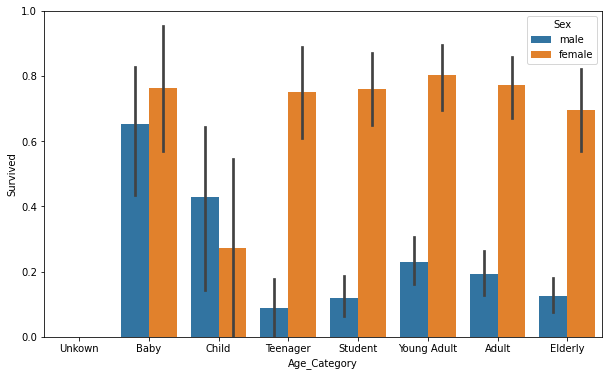

In [10]:
# 막대 그래프 크기 조정
plt.figure(figsize=(10, 6))

sns.barplot(x='Age_Category', y='Survived', hue='Sex', data=titanic_df, order=group_names)

### 지금까지의 전처리 작업을 한번에 수행할 수 있도록 함수로 만들어두기

In [27]:
from sklearn.preprocessing import LabelEncoder

# null처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 머신러닝 알고리즘에게 불필요한 속성 제거 - 사람 pk, 이름, 티켓번호
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def encoding_features(df):
    df['Cabin'] = df['Cabin'].str[:1]  # 앞글자 하나만 남기고 인코딩
    
    features = ['Cabin', 'Sex', 'Embarked']
    le = LabelEncoder()
    for feature in features:
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 최종 전처리 수행
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encoding_features(df)
    return df


### 새로 만든 함수를 이용해서 다시 원본 데이터를 최종 전처리 

In [39]:
# 원본 데이터 로드
titanic_df = pd.read_csv('data/titanic_train.csv')

# 레이블 데이터 셋
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

# 학습할 피처 데이터 셋 - 전체 전처리
X_titanic_df = transform_features(X_titanic_df)

In [40]:
X_titanic_df.head(7)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
5,3,1,29.699118,0,0,8.4583,7,2
6,1,1,54.000000,0,0,51.8625,4,3


# 모델 학습

In [41]:
# 학습 세트와 테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [42]:
# 예측 시 많이 사용하는 알고리즘 3가지를 통해 각각 예측하고 평가하기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  #로지스틱 회귀는 회귀보다 분류쪽에 가까움
from sklearn.metrics import accuracy_score  #평가

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)

# 각 알고리즘 별로 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTree accuracy: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest accuracy: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression accuracy: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))



DecisionTree accuracy: 0.7877
RandomForest accuracy: 0.8547
LogisticRegression accuracy: 0.8492


C:\Users\goott7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
